<a href="https://colab.research.google.com/github/Anusha-jain-h-c/Data-Science-Assignment/blob/main/text_mining_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install spacy

In [3]:
! pip install wordcloud

In [4]:
! pip3 install textblob

In [2]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
% matplotlib inline

In [8]:
tweets=pd.read_csv('/elon.txt',error_bad_lines=False,sep=";", encoding='cp1252')

b'Skipping line 29: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 2\nSkipping line 69: expected 1 fields, saw 2\nSkipping line 98: expected 1 fields, saw 2\nSkipping line 113: expected 1 fields, saw 2\nSkipping line 120: expected 1 fields, saw 2\nSkipping line 137: expected 1 fields, saw 2\nSkipping line 141: expected 1 fields, saw 2\nSkipping line 149: expected 1 fields, saw 2\nSkipping line 154: expected 1 fields, saw 3\nSkipping line 155: expected 1 fields, saw 2\nSkipping line 163: expected 1 fields, saw 2\nSkipping line 184: expected 1 fields, saw 2\nSkipping line 188: expected 1 fields, saw 2\nSkipping line 189: expected 1 fields, saw 2\nSkipping line 211: expected 1 fields, saw 2\nSkipping line 221: expected 1 fields, saw 2\nSkipping line 231: expected 1 fields, saw 2\nSkipping line 233: expected 1 fields, saw 2\nSkipping line 236: expected 1 fields, saw 2\nSkipping line 

In [17]:
df = tweets.rename(columns={"\tText": "tweet"})

In [18]:
df.head()

,tweet
0,1\t@kunalb11 I’m an alien
1,2\t@ID_AA_Carmack Ray tracing on Cyberpunk wit...
2,3\t@joerogan @Spotify Great interview!
3,4\t@gtera27 Doge is underestimated
4,5\t@teslacn Congratulations Tesla China for am...


In [24]:
# clean the text by removing irrelevant information 
import re
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"\t", "", text) # Remove Symbol
    text = re.sub(r"[0-9]", "", text) # Remove numbers
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

# Clean The Text
df["tweet"] = df["tweet"].apply(cleantext)

In [25]:
df.head(10)

,tweet
0,I’m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox!
6,"""Frodo was the underdoge,"
7,"All thought he would fail,"
8,Himself most of all.
9,_ Haha thanks :)


In [26]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,tweet,subjectivity,polarity
0,I’m an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1864,AI symbiosis while u wait,0.000000,0.000000
1865,There’s some of that too,0.000000,0.000000
1866,Samwise Gamgee,0.000000,0.000000
1867,Altho Dumb and Dumber is <U+F><U+F>,0.500000,-0.375000


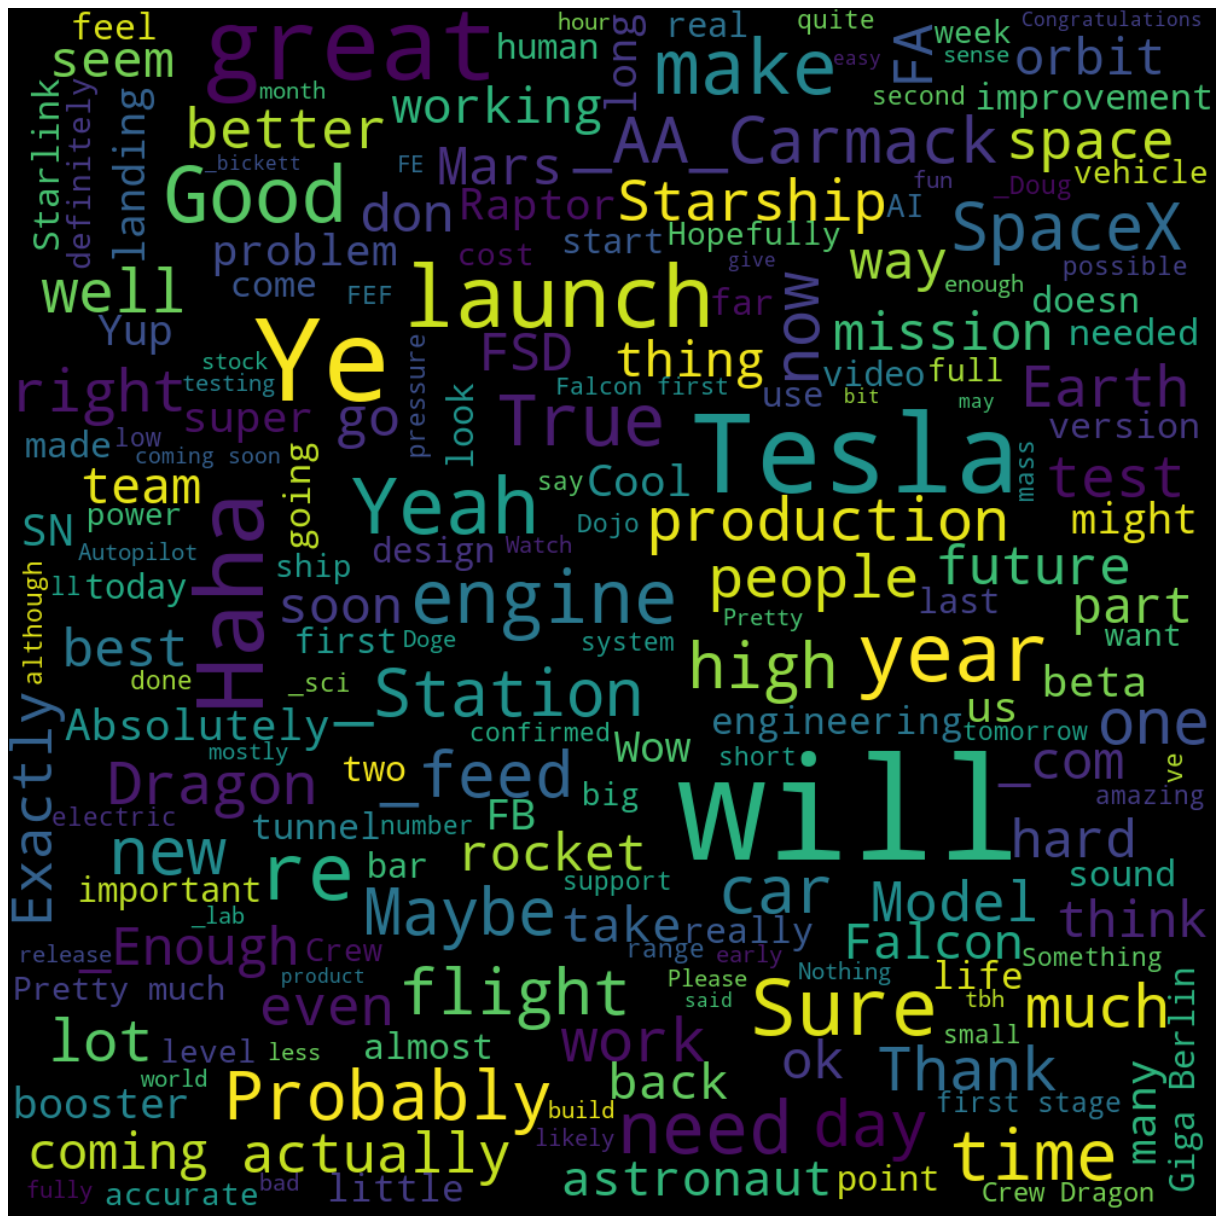

In [27]:
allwords = " ".join([twts for twts in df["tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,tweet,subjectivity,polarity,analysis
0,I’m an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1864,AI symbiosis while u wait,0.000000,0.000000,Neutral
1865,There’s some of that too,0.000000,0.000000,Neutral
1866,Samwise Gamgee,0.000000,0.000000,Neutral
1867,Altho Dumb and Dumber is <U+F><U+F>,0.500000,-0.375000,Negative


In [29]:
# extracting some positive and negative tweets with the full text
positive_tweets = df[df['analysis'] == 'Positive']
negative_tweets = df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['tweet'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -Himself most of all. 
 -_   Haha thanks :)
negative tweets
 - I’m an alien
 -All thought he would fail,
 - Your app sucks
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or… 
 -That’s what you’re missing."


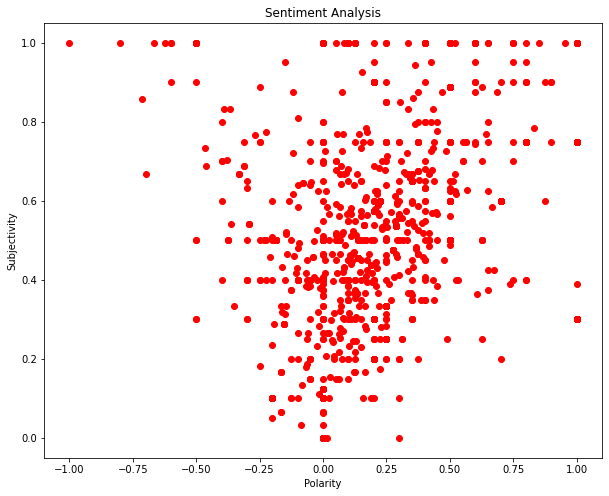

In [30]:
# scatter plot with subjectivity and polarity at the axis
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [31]:
len(positive_tweets) / len(negative_tweets)


4.4147727272727275